# *Starbucks Data Analysis*

## Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer.

This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

Someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Importing Dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('data/merged_data.csv')

In [3]:
data.sample(5)

,customer_id,event,test_day,offer_id,amount,reward,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
26634,585a0bbfeba2460faac73d8e4f98e1a6,offer viewed,25,3f207df678b143eea3cee63160fa8bed,0.00,0,M,53,2016-09-19,111000.0,0.0,4.0,informational,1.0,1.0,0.0,1.0
200013,14cc1ff21534463d9e9fce6570753307,transaction,28,NaN,19.51,0,M,62,2017-11-04,61000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84365,ec65e9186cd449908f63cbbaa16843fb,offer received,21,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00,0,M,58,2018-05-07,34000.0,20.0,10.0,discount,1.0,0.0,0.0,1.0
62523,55d77afdd5fd481aafc282f23516d7c0,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.00,0,F,49,2016-11-20,88000.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0
227214,04e0842b079c4113a759aa6e09ea17ed,offer completed,14,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.00,5,M,32,2016-10-15,46000.0,20.0,10.0,discount,1.0,0.0,0.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_id       272762 non-null  object 
 1   event             272762 non-null  object 
 2   test_day          272762 non-null  int64  
 3   offer_id          148805 non-null  object 
 4   amount            272762 non-null  float64
 5   reward            272762 non-null  int64  
 6   gender            272762 non-null  object 
 7   age               272762 non-null  int64  
 8   became_member_on  272762 non-null  object 
 9   income            272762 non-null  float64
 10  difficulty        148805 non-null  float64
 11  duration          148805 non-null  float64
 12  offer_type        148805 non-null  object 
 13  email             148805 non-null  float64
 14  mobile            148805 non-null  float64
 15  social            148805 non-null  float64
 16  web               14

#### Converting `became-member-on` to datetime format 

In [5]:
data['became_member_on'] = pd.to_datetime(data['became_member_on'])

In [6]:
data.sample(5)

,customer_id,event,test_day,offer_id,amount,reward,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
108551,e020fbd77c5445d6be1d8fba3dea9934,offer completed,20,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,5,M,41,2015-11-13,52000.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0
29873,7248fc98eb6c4b1fb0f1a2cec6ba2f93,transaction,9,NaN,25.54,0,M,34,2017-05-05,65000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52961,ea3ec5b660dd404199cdfc82a5d04295,offer received,21,ae264e3637204a6fb9bb56bc8210ddfd,0.00,0,F,87,2018-04-08,48000.0,10.0,7.0,bogo,1.0,1.0,1.0,0.0
102842,834dede1a06246598ffddc82d4ef02e9,transaction,2,NaN,8.51,0,F,43,2016-12-21,61000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211523,f88e91a11d8f405b9a47ad3741415b83,offer viewed,4,5a8bc65990b245e5a138643cd4eb9837,0.00,0,F,59,2016-01-13,71000.0,0.0,3.0,informational,1.0,1.0,1.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272762 entries, 0 to 272761
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       272762 non-null  object        
 1   event             272762 non-null  object        
 2   test_day          272762 non-null  int64         
 3   offer_id          148805 non-null  object        
 4   amount            272762 non-null  float64       
 5   reward            272762 non-null  int64         
 6   gender            272762 non-null  object        
 7   age               272762 non-null  int64         
 8   became_member_on  272762 non-null  datetime64[ns]
 9   income            272762 non-null  float64       
 10  difficulty        148805 non-null  float64       
 11  duration          148805 non-null  float64       
 12  offer_type        148805 non-null  object        
 13  email             148805 non-null  float64       
 14  mobi

In [8]:
data.describe()

,test_day,amount,reward,age,income,difficulty,duration,email,mobile,social,web
count,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,148805.000000,148805.000000,148805.0,148805.000000,148805.000000,148805.000000
mean,15.011812,6.360646,0.588575,53.840696,64337.000755,7.890561,6.625207,1.0,0.917160,0.658311,0.806747
std,8.331806,22.509207,1.889452,17.551337,21243.762941,5.041335,2.133035,0.0,0.275641,0.474277,0.394851
min,0.000000,0.000000,0.000000,18.000000,30000.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,41.000000,48000.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000
50%,17.000000,0.000000,0.000000,55.000000,62000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
75%,22.000000,9.140000,0.000000,66.000000,78000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
max,29.000000,1062.280000,10.000000,101.000000,120000.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000


#### Modifying Data

In [9]:
data.sample(5)

,customer_id,event,test_day,offer_id,amount,reward,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
247560,6d41378f12aa4fe8ad4d7be90fb9cff6,transaction,9,NaN,21.91,0,M,41,2013-10-31,79000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15049,d80211f9f5ff46408d55adee3727aff3,transaction,15,NaN,2.26,0,M,65,2016-03-23,31000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100785,83cd960ba3094a70a854aaca8232510b,transaction,29,NaN,8.89,0,M,71,2018-01-25,39000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104043,a1edbd2104ae4282996556de41ccc96b,offer completed,25,2298d6c36e964ae4a3e7e9706d1fb8c2,0.00,3,F,82,2017-11-18,109000.0,7.0,7.0,discount,1.0,1.0,1.0,1.0
208839,a4b31623ede94b5e9a945a2c1264b30d,transaction,25,NaN,3.06,0,F,52,2017-10-13,73000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### *Seperating event type `transaction` and `offers`.*

In [10]:
transaction_data = data.query('event == "transaction"')
# transaction data will have columns with only null values
# removing the rows with null values
transaction_data = transaction_data.dropna(axis = 1)

offer_data = data.query('event != "transaction"')

In [11]:
transaction_data.sample(5)

,customer_id,event,test_day,amount,reward,gender,age,became_member_on,income
25327,0ff208c9b551457db756758715073af5,transaction,9,6.38,0,M,90,2017-07-23,36000.0
237303,0a08679f042649e6b771d3fd7f6d69e7,transaction,14,14.66,0,M,37,2015-08-09,53000.0
51703,81a263ee0b8544b6a8910ee690cc6edd,transaction,16,2.32,0,F,41,2015-03-15,55000.0
246397,ca3e04a5fbd54c1a88666cc50b2a3ff9,transaction,6,14.55,0,F,73,2018-05-19,77000.0
241130,d9b71ebf67d04d6695f1ff6fac4505f6,transaction,24,1.62,0,M,61,2018-01-25,61000.0


In [12]:
offer_data.sample(5)

,customer_id,event,test_day,offer_id,amount,reward,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
125736,b55ef20dd4ba41878120c13a0e15b84d,offer viewed,8,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0,M,68,2014-07-22,71000.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0
163060,0ee730ab06b448d29aff60a13d0709dc,offer completed,21,ae264e3637204a6fb9bb56bc8210ddfd,0.0,10,F,46,2017-07-07,82000.0,10.0,7.0,bogo,1.0,1.0,1.0,0.0
203530,62c2e5535e4045a480a52cf68ab72e3e,offer received,14,f19421c1d4aa40978ebb69ca19b0e20d,0.0,0,F,76,2017-09-27,119000.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0
88048,2f10c8022a9342ce8303cca33023c303,offer received,7,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0,F,53,2015-07-28,113000.0,20.0,10.0,discount,1.0,0.0,0.0,1.0
224551,0020ccbbb6d84e358d3414a3ff76cffd,offer completed,25,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,5,F,24,2016-11-11,60000.0,5.0,7.0,bogo,1.0,1.0,0.0,1.0


In [13]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123957 entries, 2 to 272755
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       123957 non-null  object        
 1   event             123957 non-null  object        
 2   test_day          123957 non-null  int64         
 3   amount            123957 non-null  float64       
 4   reward            123957 non-null  int64         
 5   gender            123957 non-null  object        
 6   age               123957 non-null  int64         
 7   became_member_on  123957 non-null  datetime64[ns]
 8   income            123957 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 9.5+ MB


In [14]:
offer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 272761
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       148805 non-null  object        
 1   event             148805 non-null  object        
 2   test_day          148805 non-null  int64         
 3   offer_id          148805 non-null  object        
 4   amount            148805 non-null  float64       
 5   reward            148805 non-null  int64         
 6   gender            148805 non-null  object        
 7   age               148805 non-null  int64         
 8   became_member_on  148805 non-null  datetime64[ns]
 9   income            148805 non-null  float64       
 10  difficulty        148805 non-null  float64       
 11  duration          148805 non-null  float64       
 12  offer_type        148805 non-null  object        
 13  email             148805 non-null  float64       
 14  mobi

## Exploratory Data Analysis

In [15]:
# Fixing color scheme
color = sb.color_palette()[0];

In [16]:
data.sample(5)

,customer_id,event,test_day,offer_id,amount,reward,gender,age,became_member_on,income,difficulty,duration,offer_type,email,mobile,social,web
129814,516e91869c8546d8a885401e850ce66c,transaction,17,NaN,21.27,0,M,73,2017-01-11,73000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62935,4737b1f97a49491283ac0e0cced6051e,offer received,14,ae264e3637204a6fb9bb56bc8210ddfd,0.00,0,M,48,2017-04-09,79000.0,10.0,7.0,bogo,1.0,1.0,1.0,0.0
260554,a96861615a41443faaf14546c970a012,offer viewed,16,2298d6c36e964ae4a3e7e9706d1fb8c2,0.00,0,F,61,2018-02-03,47000.0,7.0,7.0,discount,1.0,1.0,1.0,1.0
198910,a0dc132fb418479e946d7a450f6c76b4,transaction,23,NaN,24.84,0,M,77,2018-05-05,66000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202138,db18858cf33f480388c0f1c2cc15fb1f,transaction,11,NaN,2.60,0,M,25,2017-09-14,64000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.describe()

,test_day,amount,reward,age,income,difficulty,duration,email,mobile,social,web
count,272762.000000,272762.000000,272762.000000,272762.000000,272762.000000,148805.000000,148805.000000,148805.0,148805.000000,148805.000000,148805.000000
mean,15.011812,6.360646,0.588575,53.840696,64337.000755,7.890561,6.625207,1.0,0.917160,0.658311,0.806747
std,8.331806,22.509207,1.889452,17.551337,21243.762941,5.041335,2.133035,0.0,0.275641,0.474277,0.394851
min,0.000000,0.000000,0.000000,18.000000,30000.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,41.000000,48000.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000
50%,17.000000,0.000000,0.000000,55.000000,62000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
75%,22.000000,9.140000,0.000000,66.000000,78000.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000
max,29.000000,1062.280000,10.000000,101.000000,120000.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000


### `Gender`
#### *Checking which gender represents more customers.*

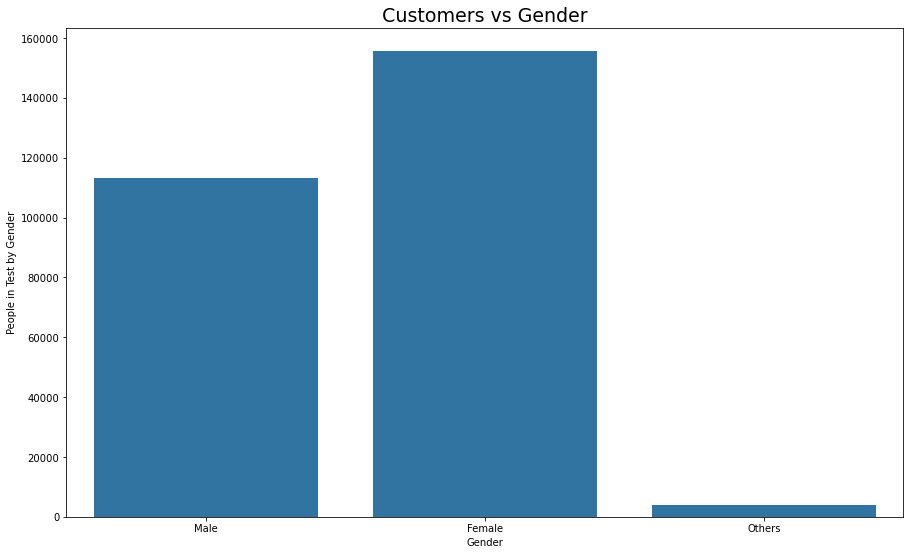

In [18]:
plt.figure(figsize = (15, 9))

ax = sb.countplot(data = data, x = 'gender', color = color);

plt.xlabel('Gender');
plt.ylabel('People in Test by Gender')
plt.title('Customers vs Gender', fontsize = 19);
ax.set_xticklabels(['Male', 'Female', 'Others']);

#### `became_member_on`

In [19]:
membership_year_month = data.groupby(data['became_member_on'].dt.to_period('M'))['customer_id'].count()
membership_year_month[:10]

became_member_on
2013-07     119
2013-08    1377
2013-09    1217
2013-10    1195
2013-11     993
2013-12    1207
2014-01    1476
2014-02    1266
2014-03    1186
2014-04    1250
Freq: M, Name: customer_id, dtype: int64

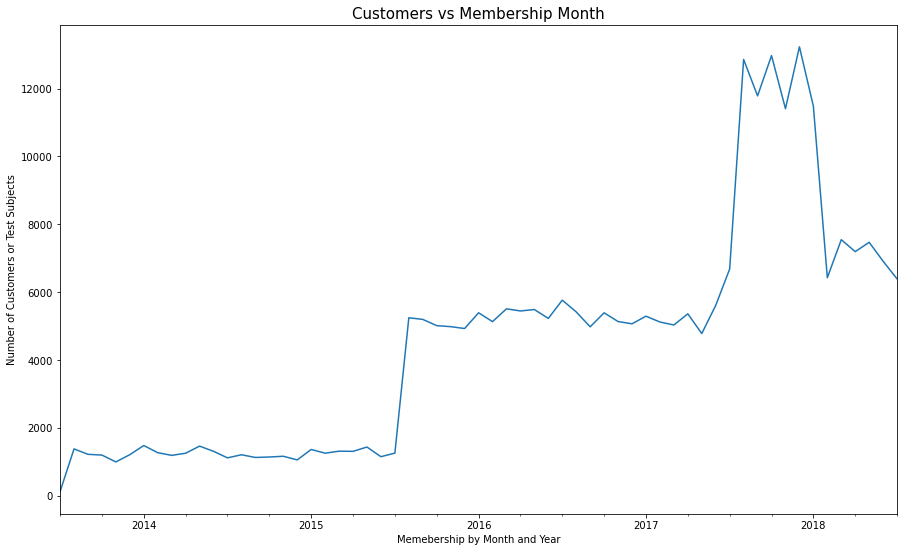

In [20]:
plt.figure(figsize = (15, 9));
membership_year_month.plot.line();
plt.title('Customers vs Membership Month', fontsize = 15)
plt.xlabel('Memebership by Month and Year')
plt.ylabel('Number of Customers or Test Subjects');

In [32]:
def annoated_barplot(data, title, xlabel, ylabel, figsize = (15, 9)):
    plt.figure(figsize = figsize)
    ax = data.plot.bar(color = color);
    ax.set_title(title, fontsize = 19);
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
    # annoations
    for point in ax.patches:
        ax.annotate('{:.3f}'.format(point.get_height()), (point.get_x() * 1.003, point.get_height() * 1.01), size = 9, rotation = 90)
    
    return ax

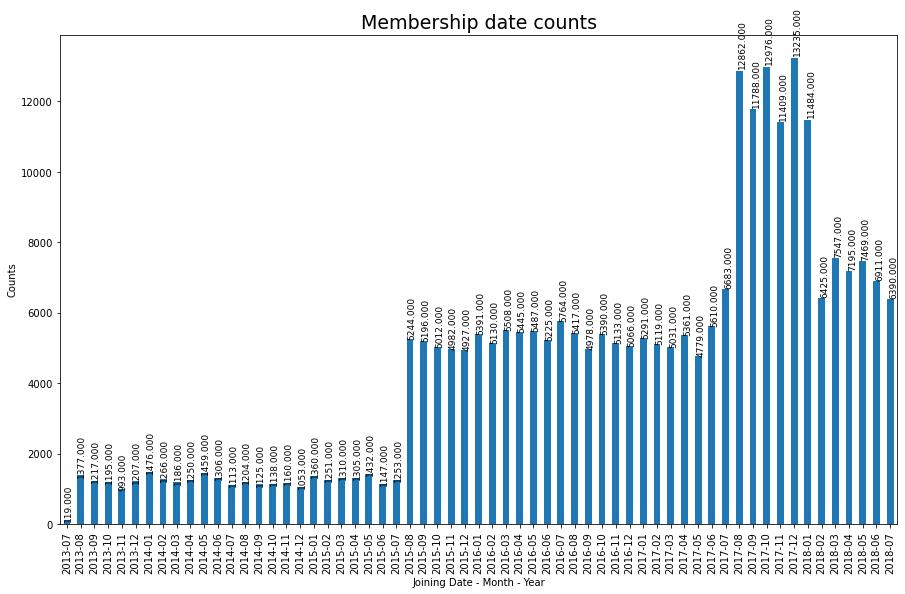

In [33]:
annoated_barplot(data = membership_year_month, title = 'Membership date counts', xlabel = 'Joining Date - Month - Year', ylabel = 'Counts', figsize = (15, 9));

#### *Membership quarterly*

In [23]:
membership_quarterly = data.groupby(data['became_member_on'].dt.to_period('Q'))['customer_id'].count()
membership_quarterly

became_member_on
2013Q3     2713
2013Q4     3395
2014Q1     3928
2014Q2     4015
2014Q3     3442
2014Q4     3351
2015Q1     3921
2015Q2     3884
2015Q3    11693
2015Q4    14921
2016Q1    16029
2016Q2    16157
2016Q3    16159
2016Q4    15589
2017Q1    15441
2017Q2    15750
2017Q3    31333
2017Q4    37620
2018Q1    25456
2018Q2    21575
2018Q3     6390
Freq: Q-DEC, Name: customer_id, dtype: int64

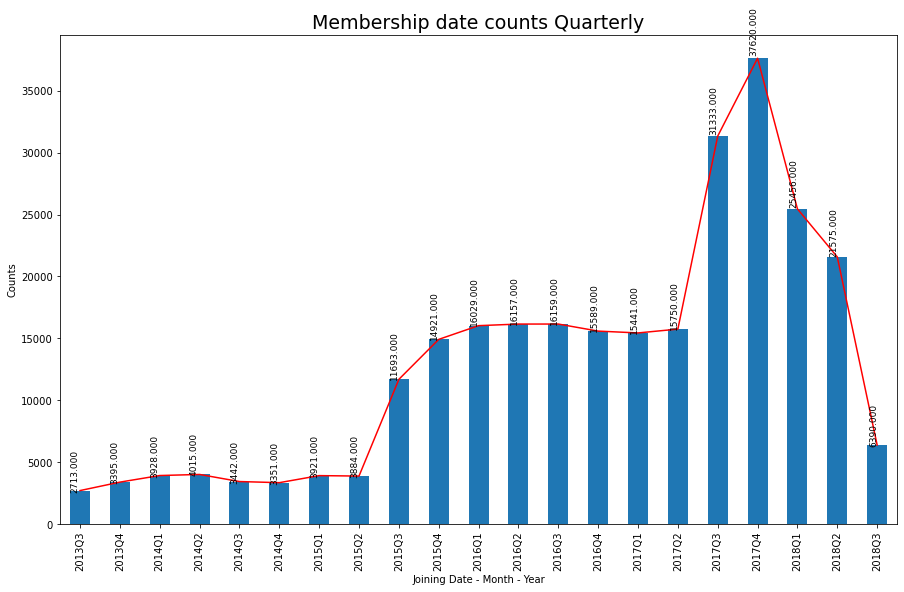

In [43]:
ax = annoated_barplot(data = membership_quarterly, title = 'Membership date counts Quarterly', xlabel = 'Joining Date - Month - Year', ylabel = 'Counts', figsize = (15, 9));
ax.plot(membership_quarterly.values, color = 'red');